# DAY 1 (MID TERM EXAM)

# DAY 2

# Sigmoid

In [1]:
import math 
import numpy as np

In [2]:
def sigmoid(x):
    return 1 /(1+math.exp(-x))
print(sigmoid(100))
print(sigmoid(0.56))
print(sigmoid(0.5))

1.0
0.6364525402815664
0.6224593312018546


# TanH

In [3]:
def tanh(x):
    return math.tan((math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x)))
print(tanh(-56))
print(tanh(50))
print(tanh(1))

-1.5574077246549023
1.5574077246549023
0.9534903170187385


# ReLU

In [4]:
def relu(x):
    return max(0,x)
print(relu(-100))
print(relu(8))

0
8


# LEAKY RELU

In [5]:
def leaky_relu(x):
    return max(0.1*x,x)
print(leaky_relu(-100))
print(leaky_relu(8))

-10.0
8


# LOSS FUNCTION

# MAE & MSE

In [6]:
y_actual = np.array([1,1,0,0,1])
y_pred = np.array([0.30,0.7,1,0,0.5])


In [7]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [8]:
e1 = mae(y_actual,y_pred)
e2 = mse(y_actual,y_pred)

In [9]:
print("mean_absolute_error:"+str(e1))
print("mean_squared_error:"+str(e2))

mean_absolute_error:0.5
mean_squared_error:0.366


# Binary Cross Entropy/Log Loss


In [10]:
from sklearn.metrics import log_loss

In [11]:
ll = log_loss(y_actual,y_pred)
print("Binary Cross Entropy/Log Loss:"+str(ll))

Binary Cross Entropy/Log Loss:7.659489663588355


# Categorical Cross Entropy


In [12]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [13]:
cce = CategoricalCrossentropy()
cce = cce(y_actual,y_pred)
print("Categorical Cross Entropy:"+str(cce))

Categorical Cross Entropy:tf.Tensor(5.0026674, shape=(), dtype=float32)


##### CNN

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.math import confusion_matrix

In [15]:
(train_images,train_label),(test_images,test_labels) = fashion_mnist.load_data()

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
test_images.shape

(10000, 28, 28)

In [18]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

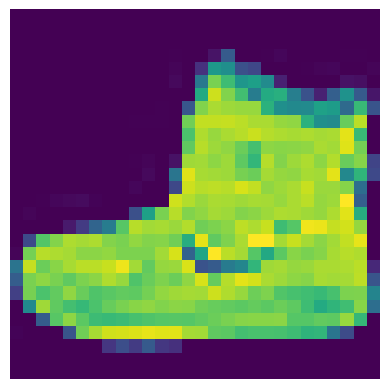

In [19]:
plt.imshow(train_images[0])
plt.axis('off')
plt.show()

In [20]:
train_label[0]

9

In [21]:
train_images = train_images/255

In [22]:
test_images = test_images/255

In [23]:
def model_cnn():
    model = keras.Sequential([keras.layers.Input(shape=(28,28,1)),
                              keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                              keras.layers.MaxPooling2D(2,2),
                              keras.layers.Flatten(),
                              keras.layers.Dense(128, activation = 'relu'),
                              keras.layers.Dense(64, activation = 'relu'),
                              keras.layers.Dense(10, activation = 'sigmoid')],
                             name = 'model_cnn')
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
                             
                  

In [24]:
model = model_cnn()

In [25]:
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,402 (982.04 KB)

 Trainable params: 251,402 (982.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(train_images,train_label, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.7670 - loss: 0.6388
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8868 - loss: 0.3109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9042 - loss: 0.2569
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9149 - loss: 0.2265
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9294 - loss: 0.1914
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9381 - loss: 0.1668
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9456 - loss: 0.1450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9527 - loss: 0.1285
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9565 - loss: 0.1169
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9620 - loss: 0.1013


In [27]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [28]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9080 - loss: 0.3158


[0.3056171238422394, 0.9107000231742859]

In [29]:
his = history.history['accuracy']
loss = history.history['loss']

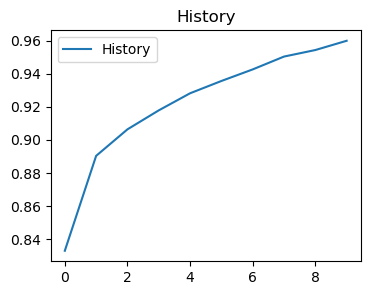

In [30]:
plt.figure(figsize = (4,3))
plt.plot(his, label='History')
plt.title('History')
plt.legend(fontsize = 10)
plt.show()     

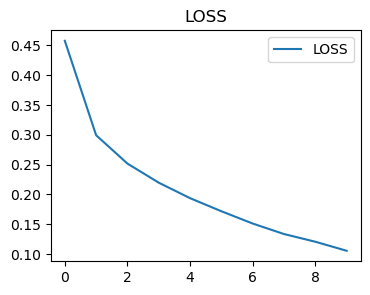

In [31]:
plt.figure(figsize = (4,3))
plt.plot(loss, label='LOSS')
plt.title('LOSS')
plt.legend(fontsize = 10)
plt.show()     

In [32]:
ypred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [33]:
ypred[0]

array([2.2056971e-05, 1.7376902e-08, 2.7233000e-07, 2.4146477e-08,
       2.0998457e-10, 6.7558497e-01, 3.3469230e-06, 3.9866615e-02,
       9.5860421e-05, 1.0000000e+00], dtype=float32)

In [34]:
ypred_label = [np.argmax(i) for i in ypred]
ypred_label[0]

9

In [35]:
test_labels[0]

9

In [36]:
cm = confusion_matrix(test_labels, ypred_label)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[931,   1,  17,   8,   1,   0,  38,   0,   4,   0],
       [  5, 982,   0,   8,   3,   0,   0,   0,   2,   0],
       [ 30,   1, 891,  10,  32,   0,  34,   0,   2,   0],
       [ 28,   9,  10, 914,  17,   0,  19,   0,   2,   1],
       [  1,   1,  75,  29, 840,   0,  50,   0,   4,   0],
       [  1,   0,   0,   0,   0, 982,   0,  12,   1,   4],
       [170,   1,  88,  26,  54,   0, 649,   0,  12,   0],
       [  0,   0,   0,   0,   0,   7,   0, 947,   0,  46],
       [  5,   1,   4,   2,   0,   0,   0,   0, 988,   0],
       [  1,   0,   0,   0,   0,   3,   0,  13,   0, 983]])>

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(test_labels,ypred_label))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.85      1000
           3       0.92      0.91      0.92      1000
           4       0.89      0.84      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.82      0.65      0.73      1000
           7       0.97      0.95      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.95      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
import cv2 as cv

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Sandal


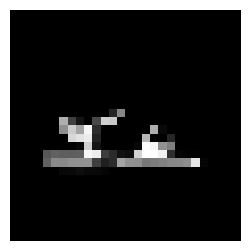

In [42]:
img = cv.imread('sandal.jpg',cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
imgg = np.invert(np.array([img]))
prediction = model.predict(imgg)
print(class_names[np.argmax(prediction)])
plt.figure(figsize=(4,3))
plt.imshow(img, cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

In [44]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

In [45]:
train_images.shape

(50000, 32, 32, 3)

In [46]:
test_images.shape

(10000, 32, 32, 3)

In [47]:
print(len(train_images))
print(len(test_images))

50000
10000


In [48]:
print(train_images[5])

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


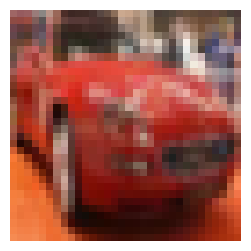

In [49]:
plt.figure(figsize=(4,3))
plt.imshow(train_images[5])
plt.axis('off')
plt.show()

In [50]:
print(train_labels[5])

[1]


In [55]:
train_images = train_images/255
test_images = test_images/255

In [60]:
def model_cnn():
    model = keras.Sequential([keras.layers.Input(shape = (32,32,3)),
                             keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'),
                             keras.layers.MaxPooling2D(2,2),
                             keras.layers.Dropout(0.3),
                             keras.layers.Flatten(),
                             keras.layers.Dense(128, activation = 'relu'),
                             keras.layers.Dropout(0.3),
                             keras.layers.Dense(64, activation = 'relu'),
                             keras.layers.Dropout(0.3),
                             keras.layers.Dense(10, activation = 'softmax')],
                            name = 'model_cnn')
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model
                  
                             

    

In [61]:
model = model_cnn()
model.summary()

Model: "model_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572,042 (2.18 MB)

 Trainable params: 572,042 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(train_images, train_labels, epochs = 25, shuffle = True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 63ms/step - accuracy: 0.3087 - loss: 1.8575
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5312 - loss: 1.3142
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5920 - loss: 1.1572
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.6258 - loss: 1.0776
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6528 - loss: 1.0074
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6685 - loss: 0.9517
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6857 - loss: 0.9128
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.6969 - loss: 0.8781
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.7016 - loss: 0.8535
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7166 - loss: 0.8326


In [63]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7205 - loss: 0.8319


[0.8344135880470276, 0.7168999910354614]

In [64]:
import cv2 as cv

In [65]:
img = cv.imread('car.jpg')
img = cv.resize(img,(32,32))
imgg = np.invert(np.array([img]))

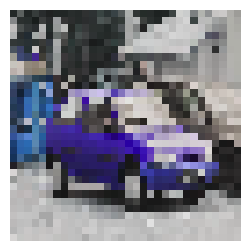

In [70]:
plt.figure(figsize=(4,3))
plt.imshow(img,cmap = plt.cm.binary)
plt.axis('off')
plt.show()

In [68]:
model.predict(imgg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)